# NSU 4. Domača naloga

## Napredna naloga

In [3]:
import numpy as np
import pandas as pd
import ProGED as pg
from DN4_2_podatky import *

In [36]:
np.random.seed(42)

gramatika = "E -> E '+' F [0.4]| E '-' F [0.2]| F [0.4] \n"
gramatika += "F -> F '*' T [0.1]| F '/' T [0.1]| T [0.8] \n"
gramatika += "T -> 'C' '*' V [0.6]| '('E')' [0.3]| 'sin' '('E')'[0.1] \n"
gramatika += "V -> 'x1' [0.25]| 'x2' [0.25]| 'x3' [0.25] | 'x5' [0.25]"


grammar = pg.GeneratorGrammar(gramatika)
podatki = generiraj_enacbo_1(1000)
ED = pg.EqDisco(data=podatki, 
                sample_size=500,
                lhs_vars=["y"],
                rhs_vars=["x1", "x2", "x3", "x5"],
                verbosity=1,
                strategy_settings = {"max_repeat":1000},
                generator = grammar)
#pg.Model
ED.generate_models()
model = ED.fit_models()
results = ED.get_results()

[C0*x1]
[C0*x1*sin(C1*x1)]
[C0*x1*sin(C1*x1)]
[C0*x1*sin(C1*x1)]
[C0*x1*sin(C1*x1)]
[C0*x1*sin(C1*x1)]
[C0*x1 + C1*x2]
[C0*x5]
[C0*x2*x5]
[C0*x2]
[C0*x2]
[C0*x3]
[C0*x3]
[C0*x3]
[C0*x1 + C1*x5]
[C0*x1 + C1*x3]
[C0*x1 + C1*x3]
[C0*x1**3 + C1*x1*x3 + C2*x2]
[C0*x1**3 + C1*x1*x3 + C2*x2]
[C0*x1**3 + C1*x1*x3 + C2*x2]
[C0*x1**3 + C1*x1*x3 + C2*x2]
[C0*x1*x2]
[C0*x1*x2]
[C0*x1*x2]
[C0*x1*x2]
[C0*x1*x2]
[C0*x1*x2]
[C0*x1*x2]
[C0*x1*x2]
[C0*x1*x3]
[C0*x1*x3]
[C0*x1*x3]
[C0*x1*x3]
[C0*x1*x3]
[C0*x1**2 + sin(C1*x1)]
[C0*x1**2 + sin(C1*x1)]
[C0*x1**2 + sin(C1*x1)]
[C0*x1**2 + sin(C1*x1)]
[C0*x1**2 + sin(C1*x1)]
[C0*x1**2 + sin(C1*x1)]
[C0*x1**2 + sin(C1*x1)]
[C0*x1**2 + sin(C1*x1)]
[C0*x1**2*x2 + C1*x2]
[C0*x1**2*x2 + C1*x2]
[C0*x2*x3]
[C0*x2*x3]
[C0*x1*x3*x5]
[C0*x1*x3*x5]
[C0*x1*x3*x5]
[C0*x1*x3*x5]
[C0*x1*x3*x5]
[C0*x1*x3*x5 + C1*x5]
[C0*x1*x5]
[C0*x1**2]
[C0*x1 + C1*x5 - sin(C2*x2 + C3*x3**2/(x1*x2))]
[C0*x1 + C1*x5 - sin(C2*x2 + C3*x3**2/(x1*x2))]
[sin(C0*x1)]
[C0*x2 + C1*x3**2]
[C0*x2 + C1

In [39]:
ED.get_results(100)

ModelBox: 100 models
-> [0.999999997818676*x1 - 3.00000001114297*x2 - 1.00000000684135*x3 + 0.999999993817321*x5], p = 6.9983999999999985e-09, error = 8.539845886899985e-08, time = 1.2337453365325928
-> [1.02203448562104*x1 - 3.00038668559089*x2 + 0.994643169290617*x5], p = 4.635911646719999e-06, error = 5.699283284055173, time = 0.13167047500610352
-> [-0.00482322459711138*x1*x5 + 0.989963415571644*x1 - 2.9998716293188*x2 - 0.993310540384601*x3], p = 6.998399999999998e-10, error = 5.775573117988835, time = 0.28248023986816406
-> [0.988360910556019*x1 - 2.99803614536842*x2 - 0.994494468330797*x3], p = 1.6588799999999998e-06, error = 5.777737850361965, time = 0.13550734519958496
-> [-3.0252003086613*x2 - 1.02282047767441*x3 + 0.988270656488498*x5], p = 2.16e-06, error = 5.800096922522891, time = 0.1367495059967041
-> [0.986945807152145*x1 - 2.99474714742132*x2 - 1.00088630341828*x3 - sin(7.87337004791652*x2) - sin(3.18831490033944*x3)], p = 1.0287647999999999e-13, error = 5.808289796767

Najde pravo enačbo, sicer po dolgotrajnem postopkuk, vendar jo. (+ v navodilih je enačba drugačna kot v podatkih - predznak pred $x_5$)

Vidimo tudi da je napaka prave enačbe občutno manjša kot napaka ostalih enačb (za več redov velikosti). Gramatiko posodabljamo, če je napaka manjša od 10? 5? Drugače se verjetno ne splača.

Ideja po korakih je sledeča:

- generiramo eno kandidatno enačbo s funkcijo *EqDisco*,

- optimiziramo parametre (konstante C) in izračunamo napako (in verjetnosti) - prek funkcij *fit_models* in *get_results*

- za odkrito enačbo poračunamo napako

In [52]:
np.random.seed(42)

ED = pg.EqDisco(data=podatki, 
                sample_size=1,
                lhs_vars=["y"],
                rhs_vars=["x1", "x2", "x3", "x5"],
                verbosity=1,
                generator = grammar)
ED.generate_models()
model = ED.fit_models()
ED.get_results()

[C0*x1*sin(C1*x1)]


ModelBox: 1 models
-> [-0.124963433546712*x1*sin(2.6856189647473*x1)], p = 7.257600000000001e-06, error = 20.54561868620833, time = 0.10110092163085938

In [149]:
napaka = ED.models[0].get_error()
napaka

20.511253764643197

Ko opravimo s prejšnjimi koraki moramo iz drevesa razbrati pot, po kateri je bila generirana odkrita enačba. S tem namenom postopamo kot sledi:

- iz informacij o drevesu modela (gnezdeni seznami) moramo najprej dobiti obliko, ki jo bomo znali brati - ustvarimo funkcijo *flatten_rules* s katero spremenimo drevesno obliko v seznam

- nato s pomočjo funkcije *gramatika_v_slovar* gramatiko iz seznama pretvorimo v slovarsko obliko, da se bomo lažje premikali po njej in ločevali med levo in desno stranjo enačb

In [64]:
def flatten_rules(data):
    rules = []

    def helper(nested_rules):
        for rule in nested_rules:
            if isinstance(rule, list):
                helper(rule)
            else:
                rules.append(rule)

    for key in data:
        helper(data[key][1])

    return rules

In [143]:
gramatika_seznam = flatten_rules(model[0].info['trees'])
gramatika_seznam

[E -> F [0.2],
 F -> F '/' T [0.4],
 F -> T [0.4],
 T -> 'sin' '(' E ')' [0.35],
 E -> F [0.2],
 F -> T [0.4],
 T -> 'C' '*' V [0.3],
 V -> 'x1' [0.3],
 T -> 'C' '*' V [0.3],
 V -> 'x1' [0.3]]

In [144]:
from collections import defaultdict

def gramatika_v_slovar(gramatika):
    slovar = defaultdict(dict)
    for element in gramatika:
        slovar[element.lhs()][element.rhs()] = element.prob()
    return slovar

defaultdict(dict,
            {E: {(F,): 0.2},
             F: {(F, '/', T): 0.4, (T,): 0.4},
             T: {('sin', '(', E, ')'): 0.35, ('C', '*', V): 0.3},
             V: {('x1',): 0.3}})

In [145]:
enacba_slovar = gramatika_v_slovar(gramatika_seznam)
enacba_slovar

defaultdict(dict,
            {E: {(F,): 0.2},
             F: {(F, '/', T): 0.4, (T,): 0.4},
             T: {('sin', '(', E, ')'): 0.35, ('C', '*', V): 0.3},
             V: {('x1',): 0.3}})

Prek funkcije *posodobi_gramatiko* spreminjamo ustvarjen slovar. Pri tem upoštevamo sledeča pravila:

- če je dano pravilo bilo uporabljeno za odkrivanje dane enačbe in je napaka velika (večja od 5), potem temu pravilu zmanjšamo verjetnost za število njegovih pojavitev v drevesu pomnoženim z neko željeno spremembo (privzeta vrednost je 0.01)

- če je dano pravilo bilo uporabljeno za odkrivanje dane enačbe in je napaka majhna (manjša od 5), potem temu pravilu verjetnost povečamo za enako vrednost kot v prejšnji točki

- če dano pravilo za odkrivanje dane enačbe ni bilo uporabljeno ostana njegova verjetnost enaka.

Na koncu verjetnosti standardiziramo, tako da se seštejejo v 1 za vsako pravilo in si shranimo slovar.

In [147]:
prvotni_slovar = gramatika_v_slovar(grammar.grammar.productions())
prvotni_slovar

defaultdict(dict,
            {E: {(E, '+', F): 0.5, (E, '-', F): 0.3, (F,): 0.2},
             F: {(F, '*', T): 0.2, (F, '/', T): 0.4, (T,): 0.4},
             T: {('C', '*', V): 0.3,
              ('(', E, ')'): 0.35,
              ('sin', '(', E, ')'): 0.35},
             V: {('x1',): 0.3, ('x2',): 0.25, ('x3',): 0.25, ('x5',): 0.2}})

In [148]:
def posodobi_gramatiko(prvotni_slovar, enacba_slovar, is_error_big, sprememba=0.01):
    enacba = {item for sublist in map(list, enacba_slovar.values()) for item in sublist}

    for var, rules in prvotni_slovar.items():
        num = len(enacba_slovar[var])
        s = 0

        for rule, prob in rules.items():
            if rule in enacba:
                if is_error_big:
                    prvotni_slovar[var][rule] = max(prob - num * sprememba, 0)
                else:
                    prvotni_slovar[var][rule] += num * sprememba
            #else:
            #    if is_error_big:
            #        prvotni_slovar[var][rule] += num * sprememba
            #    else:
            #        prvotni_slovar[var][rule] = max(prob - num * sprememba, 0)

            s += prvotni_slovar[var][rule]

        if s:  # Avoid division by zero
            for rule in rules:
                prvotni_slovar[var][rule] /= s

    return prvotni_slovar

In [151]:
nov_slovar = posodobi_gramatiko(prvotni_slovar, enacba_slovar, napaka > 5)
nov_slovar

defaultdict(dict,
            {E: {(E, '+', F): 0.5101520253035404,
              (E, '-', F): 0.30609121518212423,
              (F,): 0.18375675951433526},
             F: {(F, '*', T): 0.21701388888888887,
              (F, '/', T): 0.3914930555555555,
              (T,): 0.3914930555555555},
             T: {('C', '*', V): 0.2829861111111111,
              ('(', E, ')'): 0.37977430555555564,
              ('sin', '(', E, ')'): 0.3372395833333333},
             V: {('x1',): 0.28578716457504333,
              ('x2',): 0.25507601265177027,
              ('x3',): 0.25507601265177027,
              ('x5',): 0.20406081012141622}})

Na koncu spremenimo slovar nazaj v obliko, ki jo bo *Eq.Disco* znal uporabiti za odkrivanje nove enačbe z posodobljenimi verjetnostmi.

In [152]:
from nltk.grammar import ProbabilisticProduction
from nltk.grammar import PCFG
from nltk import Nonterminal

def ustvari_gramatiko(slovar):
    gramatika = [ProbabilisticProduction(var, list(rule), prob=prob)
                 for var, dict_rull_prob in slovar.items()
                 for rule, prob in dict_rull_prob.items()]
    
    return pg.GeneratorGrammar(PCFG(Nonterminal('E'), gramatika))

In [153]:
nova_gramatika = ustvari_gramatiko(nov_slovar)
nova_gramatika

Grammar with 13 productions (start state = E)
    E -> E '+' F [0.510152]
    E -> E '-' F [0.306091]
    E -> F [0.183757]
    F -> F '*' T [0.217014]
    F -> F '/' T [0.391493]
    F -> T [0.391493]
    T -> 'C' '*' V [0.282986]
    T -> '(' E ')' [0.379774]
    T -> 'sin' '(' E ')' [0.33724]
    V -> 'x1' [0.285787]
    V -> 'x2' [0.255076]
    V -> 'x3' [0.255076]
    V -> 'x5' [0.204061]

Vse skupaj združimo v eno funkcijo *poisci_enacbo*. V njej nastavimo še minimalno število iteracij na 100 in pogoj, da more biti končna napaka manjša od 1 - saj smo na primeru videli razliko v rangih pravilne enačbe in prve naslednje.

In [209]:
np.random.seed(42)
def poisci_enacbo(gramatika, podatki, stevilo_iteracij = 100, sprememba=0.01, rhs_vars = ["x1", "x2", "x3", "x4", "x5"], eps=10):
    grammar = pg.GeneratorGrammar(gramatika)
    ED = pg.EqDisco(data=podatki, 
                    sample_size=stevilo_iteracij,
                    lhs_vars=["y"],
                    rhs_vars=rhs_vars,
                    verbosity=1,
                    generator = grammar)
    ED.generate_models()
    model = ED.fit_models()
    rezultati = ED.get_results()

    napaka = rezultati[0].get_error()
    min_error = napaka

    prvotni_slovar = gramatika_v_slovar(grammar.grammar.productions())
    enacba_slovar = gramatika_v_slovar(flatten_rules(model[0].info['trees']))

    n = 0
    napaka_nova = 10
    while n < stevilo_iteracij and napaka_nova >= eps:
        nov_slovar = posodobi_gramatiko(prvotni_slovar, enacba_slovar, napaka_nova > 10 or napaka < napaka_nova)
        
        nova_gramatika = ustvari_gramatiko(nov_slovar)
        print(nova_gramatika)
        ED2 = pg.EqDisco(data=podatki, 
                sample_size=1,#stevilo_iteracij,
                lhs_vars=["y"],
                rhs_vars=rhs_vars,
                verbosity=1,
                generator = nova_gramatika)
        ED2.generate_models()
        model2 = ED2.fit_models()
        rezultati2 = ED2.get_results(3)
        #print(rezultati2)

        prvotni_slovar = gramatika_v_slovar(nova_gramatika.grammar.productions())
        enacba_slovar = gramatika_v_slovar(flatten_rules(model2[0].info['trees']))

        napaka = napaka_nova
        napaka_nova = rezultati2[0].get_error()
        min_error = min(min_error, napaka_nova)
        n += 1

    print(nova_gramatika)
    print(rezultati2)
    return([rezultati2, min_error])

In [210]:
np.random.seed(42)
gramatika = "E -> E '+' F [0.4]| E '-' F [0.2]| F [0.4] \n"
gramatika += "F -> F '*' T [0.1]| F '/' T [0.1]| T [0.8] \n"
gramatika += "T -> 'C' '*' V [0.6]| '('E')' [0.3]| 'sin' '('E')'[0.1] \n"
gramatika += "V -> 'x1' [0.25]| 'x2' [0.25]| 'x3' [0.25] | 'x5' [0.25]"

enacba1 = poisci_enacbo(gramatika, podatki, sprememba=0.01, rhs_vars=["x1", "x2", "x3", "x5"], eps=1)

[C0*x1*x2*(C1*x1 + C2*x2 + C3*x2/(C4*x1**2*sin(C5*x3) + C6*x1*x5 + C7*x2*(C74*x1 + C75*x3 + C76*x5 + C8*x1**2 + C9*x1*(C10*x1 + C11*x5*(C12*x1*(C13*x2 + C14*x3 + C15*x5)*(C16*x1*x3*sin(C17*x1*x2*x3*(C18*x1 + C19*x3)*(C20*x1 + C21*x2 + C22*x3 + C23*x5) + C24*x5 + sin(C25*x5**2)) + C26*x1 + C27*x2*x3*x5 + C28*x2 + C29*x3 + C30*x5**2 + C31*x5*sin(C32*x1) + C33*x5*sin(C34*x5) + C35*x5*sin(C36*x1*x3 + C37*x1 + C38*x2*(C39*x5 + sin(C40*x5)) + C41*x3*x5 + C42*x5) + C43*x5 + C44*x5/x2 - sin(C45*x2)*sin(C46*x3 - sin(C47*x1 + C48*x2 + C49*x3)) + sin(C50*x5) + sin(C51*x2 + C52*x5)) + C53*x1 + C54*x2*x5 + C55*x2 + C56*x3**2*x5*sin(C57*x1 + C58*x2 - (C59*x1*x2 + C60*x1)/sin(C61*x2 + C62*x3 + sin(C63*x2))) + C64*x3 + C65*x5 + C66*x2**2/(x1*(C67*x1*x2**2*x3*x5 + C68*x5)*sin(C69*x1 + C70*x3)) + (C71*x3 + C72*x5)/sin(C73*x3))) - sin(C77*x1*x5 + C78*x1 + C79*x2 + C80*x3 + C81*x5 + sin(C82*x3))) + C83*x3) + C84*x2/(C85*x2*x5 + C86*x2 + C87*x3*x5) + C88*x3 + C89*x5)/sin(C108*x1 + C109*x2*x5 + C110*x2 + C1

In [174]:
print(f"Najmanjša napaka prve enačbe: {enacba1[1]}")

Najmanjša napaka prve enačbe: 7.473147639429038e-08


In [218]:
np.random.seed(42)
st_enacb = [10,20,30,40,50,60,70,80,90,100]
min_errors_alg1 = []
min_errors_alg2 = []

gramatika = "E -> E '+' F [0.4]| E '-' F [0.2]| F [0.4] \n"
gramatika += "F -> F '*' T [0.1]| F '/' T [0.1]| T [0.8] \n"
gramatika += "T -> 'C' '*' V [0.6]| '('E')' [0.3]| 'sin' '('E')'[0.1] \n"
gramatika += "V -> 'x1' [0.25]| 'x2' [0.25]| 'x3' [0.25] | 'x5' [0.25]"
grammar = pg.GeneratorGrammar(gramatika)
podatki = generiraj_enacbo_1(1000)

for stevilo in st_enacb:
    min_errors_i1 = []
    min_errors_i2 = []
    for i in range(1,6):
        ED = pg.EqDisco(data=podatki, 
                    sample_size=stevilo,
                    lhs_vars=["y"],
                    rhs_vars=["x1", "x2", "x3", "x5"],
                    verbosity=1,
                    generator = grammar)

        ED.generate_models()
        model = ED.fit_models()
        results = ED.get_results()
        min_errors_i1.append(results[0].get_error())

        enacba1 = poisci_enacbo(gramatika, podatki, stevilo_iteracij=stevilo, sprememba=0.01, rhs_vars=["x1", "x2", "x3", "x5"])
        min_errors_i2.append(enacba1[1])
    min_errors_alg1.append(np.mean(min_errors_i1))
    min_errors_alg2.append(np.mean(min_errors_i2))

[C0*x3]
[C0*x3/sin(C1*x1 + C2*x3*(C3*x1*x5 + C4*x2))]
[C0*x3/sin(C1*x1 + C2*x3*(C3*x1*x5 + C4*x2))]
[C0*x2]
[C0*x3*x5*(C1*x2*x3 + C2*x3)*sin(sin(C3*x2 + C4*x3*x5 + C5*x3 - (C6*x1 + C7*x2 + C8*x3 + C9*x5 - sin(C10*x1) + sin(sin(C11*x1 + C12*x1*(C13*x2 + C14*x3)/x3 + C15*x2 + C16*x2/(C17*x2 + C18*x5) + C19*x5)))*sin(C20*x2*x5)))]
[C0*x5 + sin(C1*x1*(C2*x1 + C3*x5) + C23*x3 + C24*x5 + C4*x1 + C5*x2 + C6*x3*(C16*x5 + C7*x1 + C8*x2 + C9*x3**2*(C10*x1 + C11*(C12*x1*x3 + C13*x2**2 + C14*x2 + C15*x3)/x1) - sin(C17*x2) - sin(C18*x1 + C19*x2 + C20*x3*x5 + C21*x3 + C22*x5)) - sin(C25*x1) - sin(C26*x3*(C27*x1*x2 + C28*x2*x3*sin(C29*x3 + C30*x5) + C31*x3 + C32*x5)))]
[C0*x5]
[C0*x1*x3 + C1*x3*sin(sin(C2*x3)) + C3*x5 + sin(C11*x2 + C12*x3 + C13*x5 + C4*x1/(C5*x1 + C6*x2**2 + C7*x3 - sin(C8*x3 + C9*x5 + sin(C10*x2))))]
[C0*x1*x3 + C1*x3*sin(sin(C2*x3)) + C3*x5 + sin(C11*x2 + C12*x3 + C13*x5 + C4*x1/(C5*x1 + C6*x2**2 + C7*x3 - sin(C8*x3 + C9*x5 + sin(C10*x2))))]
[C0*x1*x2**2*x3 + C1*x1 + C2*x2]
Model 

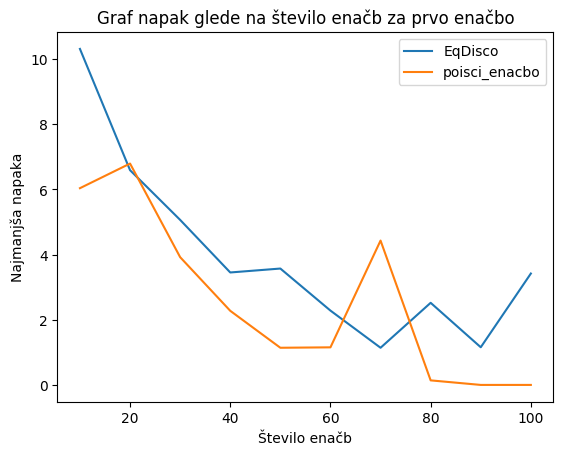

In [219]:
import matplotlib.pyplot as plt

ax = plt.subplot()
ax.plot(st_enacb, min_errors_alg1, label = "EqDisco")
ax.plot(st_enacb, min_errors_alg2, label = "poisci_enacbo")
ax.set_xlabel("Število enačb")
ax.set_ylabel("Najmanjša napaka")
ax.set_title("Graf napak glede na število enačb za prvo enačbo")
ax.legend()

Ponovimo enako še za drugi dve enačbi.

In [160]:
podatki2 = generiraj_enacbo_2(1000)

gramatika2 = "E -> E '+' F [0.4]| E '-' F [0.2]| F [0.4] \n"
gramatika2 += "F -> F '*' T [0.8]| F '/' T [0.1]| T [0.1] \n"
gramatika2 += "T -> 'C' '*' V [0.6]| '('E')' [0.3]| 'sin' '('E')'[0.1] \n"
gramatika2 += "V -> 'x1' [0.5]| 'x2' [0.5]"

enacba2 = poisci_enacbo(gramatika2, podatki2, rhs_vars=["x1", "x2"])

[C0*x1**5]
[C0*x1**2]
[C0*x1*x2**2]
[C0*x1]
[C0*x2]
[C0*x1*x2]
[C0*x1**2*x2]
[C0*x1**2*x2]
[C0*x1**2*x2]
[C0*x1**2*x2]
Grammar with 11 productions (start state = E)
    E -> E '+' F [0.40404]
    E -> E '-' F [0.20202]
    E -> F [0.393939]
    F -> F '*' T [0.8125]
    F -> F '/' T [0.104167]
    F -> T [0.0833333]
    T -> 'C' '*' V [0.604167]
    T -> '(' E ')' [0.291667]
    T -> 'sin' '(' E ')' [0.104167]
    V -> 'x1' [0.494949]
    V -> 'x2' [0.505051]
[C0*x2]
[C0*x2]
[C0*x1**2*x2]
[C0*x1*x2]
[C0*x1*x2**3]
[C0*x1*x2**2]
[C0*x1*x2**2]
[C0*x1**4 + C1*x2]
[C0*x1**4 + C1*x2]
[C0*x1**2]
[C0*x1**2]
[C0*x1]
[C0*x1]
[C0*x1]
[C0*x1**2*x2 + sin(C1*x1)]
[C0*x2**2]
[C0*x2**3]
[C0*x1**3*x2**2]
[C0*x1**3*x2**2]
[C0*x1**3*x2**2]
[C0*x1**2*sin(C1*x1**2*x2)]
[C0*x1**2*sin(C1*x1**2*x2)]
[C0*x1**2*sin(C1*x1**2*x2)]
[C0*x1**2*sin(C1*x1**2*x2)]
[C0*x1**2*sin(C1*x1**2*x2)]
[C0*x1**2*sin(C1*x1**2*x2)]
[C0*x1**2*sin(C1*x1**2*x2)]
[C0*x1**2*sin(C1*x1**2*x2)]
[C0*x1**2*sin(C1*x1**2*x2)]
[C0*x1**2*sin(C1*

In [220]:
np.random.seed(42)
st_enacb = [10,20,30,40,50,60,70,80,90,100]
min_errors_alg1_2 = []
min_errors_alg2_2 = []

gramatika2 = "E -> E '+' F [0.4]| E '-' F [0.2]| F [0.4] \n"
gramatika2 += "F -> F '*' T [0.8]| F '/' T [0.1]| T [0.1] \n"
gramatika2 += "T -> 'C' '*' V [0.6]| '('E')' [0.3]| 'sin' '('E')'[0.1] \n"
gramatika2 += "V -> 'x1' [0.5]| 'x2' [0.5]"
grammar2 = pg.GeneratorGrammar(gramatika2)
podatki2 = generiraj_enacbo_2(1000)

for stevilo in st_enacb:
    min_errors_i1 = []
    min_errors_i2 = []
    for i in range(1,6):
        ED = pg.EqDisco(data=podatki2, 
                    sample_size=stevilo,
                    lhs_vars=["y"],
                    rhs_vars=["x1", "x2"],
                    verbosity=1,
                    generator = grammar2)

        ED.generate_models()
        model = ED.fit_models()
        results = ED.get_results()
        min_errors_i1.append(results[0].get_error())

        enacba1 = poisci_enacbo(gramatika2, podatki2, stevilo_iteracij=stevilo, sprememba=0.01, rhs_vars=["x1", "x2"])
        min_errors_i2.append(enacba1[1])
    min_errors_alg1_2.append(np.mean(min_errors_i1))
    min_errors_alg2_2.append(np.mean(min_errors_i2))

[C0*x1]
[C0*x1*x2**2]
[C0*x1*x2**2]
[C0*x1*x2**2]
[C0*x2]
[C0*x1**3*x2**3 + C1*x1*x2]
[C0*x1**4*x2**2]
[C0*x1**2*sin(C1*x1 + C2*x2)]
[C0*x1*x2**2 + C1*x1*x2]
[C0*x1**2]
[C0*x1*x2**3]
[C0*x2]
[C0*x1]
[C0*x1**4 + C1*x1*x2]
[C0*x1**3*x2*sin(C1*x1)]
[C0*x1*x2]
[C0*x2**6]
[C0*x2**6]
[C0*x2**6]
[C0*x2**2]
Grammar with 11 productions (start state = E)
    E -> E '+' F [0.40404]
    E -> E '-' F [0.20202]
    E -> F [0.393939]
    F -> F '*' T [0.8125]
    F -> F '/' T [0.104167]
    F -> T [0.0833333]
    T -> 'C' '*' V [0.59596]
    T -> '(' E ')' [0.30303]
    T -> 'sin' '(' E ')' [0.10101]
    V -> 'x1' [0.5]
    V -> 'x2' [0.5]
[C0*x1**3*x2**2]
[C0*x1*x2]
[C0*x2**2]
[C0*x2**2]
[C0*x2**3]
[C0*x1]
[C0*x1]
[C0*x1*x2 + C1*x1]
[C0*x1*x2 + C1*x1]
[C0*x1*x2 + C1*x1]
Grammar with 11 productions (start state = E)
    E -> E '+' F [0.40404]
    E -> E '-' F [0.20202]
    E -> F [0.393939]
    F -> F '*' T [0.8125]
    F -> F '/' T [0.104167]
    F -> T [0.0833333]
    T -> 'C' '*' V [0.59596]
    T

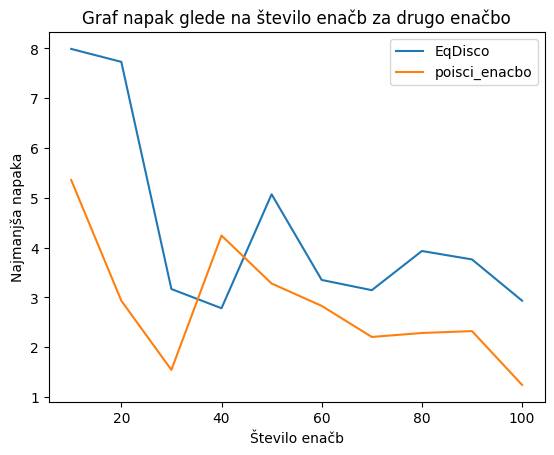

In [221]:
ax = plt.subplot()
ax.plot(st_enacb, min_errors_alg1_2, label = "EqDisco")
ax.plot(st_enacb, min_errors_alg2_2, label = "poisci_enacbo")
ax.set_xlabel("Število enačb")
ax.set_ylabel("Najmanjša napaka")
ax.set_title("Graf napak glede na število enačb za drugo enačbo")
ax.legend()

In [ ]:
podatki3 = generiraj_enacbo_3(1000)

gramatika3 = "E -> E '+' F [0.4]| E '-' F [0.2]| F [0.4] \n"
gramatika3 += "F -> F '*' T [0.2]| F '/' T [0.6]| T [0.2] \n"
gramatika3 += "T -> 'C' '*' V [0.1]| '('E')' [0.4]| 'sin' '('E')'[0.5] \n"
gramatika3 += "V -> 'x1' [0.5]| 'x2' [0.5]"

enacba3 = poisci_enacbo(gramatika3, podatki3, rhs_vars=["x1", "x2"], eps=0.1)

In [223]:
np.random.seed(42)
st_enacb = [10,20,30,40,50,60,70,80,90,100]
min_errors_alg1_3 = []
min_errors_alg2_3 = []

gramatika3 = "E -> E '+' F [0.4]| E '-' F [0.2]| F [0.4] \n"
gramatika3 += "F -> F '*' T [0.2]| F '/' T [0.6]| T [0.2] \n"
gramatika3 += "T -> 'C' '*' V [0.1]| '('E')' [0.4]| 'sin' '('E')'[0.5] \n"
gramatika3 += "V -> 'x1' [0.5]| 'x2' [0.5]"
grammar3 = pg.GeneratorGrammar(gramatika3)
podatki3 = generiraj_enacbo_3(1000)

for stevilo in st_enacb:
    min_errors_i1 = []
    min_errors_i2 = []
    for i in range(1,6):
        ED = pg.EqDisco(data=podatki3, 
                    sample_size=stevilo,
                    lhs_vars=["y"],
                    rhs_vars=["x1", "x2"],
                    verbosity=1,
                    generator = grammar3)

        ED.generate_models()
        model = ED.fit_models()
        results = ED.get_results()
        min_errors_i1.append(results[0].get_error())

        enacba1 = poisci_enacbo(gramatika3, podatki3, stevilo_iteracij=stevilo, sprememba=0.01, rhs_vars=["x1", "x2"])
        min_errors_i2.append(enacba1[1])
    min_errors_alg1_3.append(np.mean(min_errors_i1))
    min_errors_alg2_3.append(np.mean(min_errors_i2))

[C0*x2]
[C0*x1]
[C0*x1]
[C0*x1]
[C0*x2]
[C0*x1 + C1*x2]
[C0*x1 + C1*x2]
[C0*x1]
[C0*x1]
[sin(C0*x1)]
[sin(C0*x1)]
[sin(C0*x1)]
Grammar with 11 productions (start state = E)
    E -> E '+' F [0.39604]
    E -> E '-' F [0.19802]
    E -> F [0.405941]
    F -> F '*' T [0.19802]
    F -> F '/' T [0.594059]
    F -> T [0.207921]
    T -> 'C' '*' V [0.108911]
    T -> '(' E ')' [0.39604]
    T -> 'sin' '(' E ')' [0.49505]
    V -> 'x1' [0.49505]
    V -> 'x2' [0.50495]
[C0*x2]
[C0*x1]
[sin(C0*x1)]
[sin(C0*x1)]
[sin(C0*x1)]
[sin(C0*x1)]
[sin(C0*x1)]
Grammar with 11 productions (start state = E)
    E -> E '+' F [0.39604]
    E -> E '-' F [0.19802]
    E -> F [0.405941]
    F -> F '*' T [0.19802]
    F -> F '/' T [0.594059]
    F -> T [0.207921]
    T -> 'C' '*' V [0.108911]
    T -> '(' E ')' [0.39604]
    T -> 'sin' '(' E ')' [0.49505]
    V -> 'x1' [0.49505]
    V -> 'x2' [0.50495]
ModelBox: 3 models
-> [1.2294291234427*x1], p = 0.004550722421298376, error = 0.676743267366264, time = 0.0189

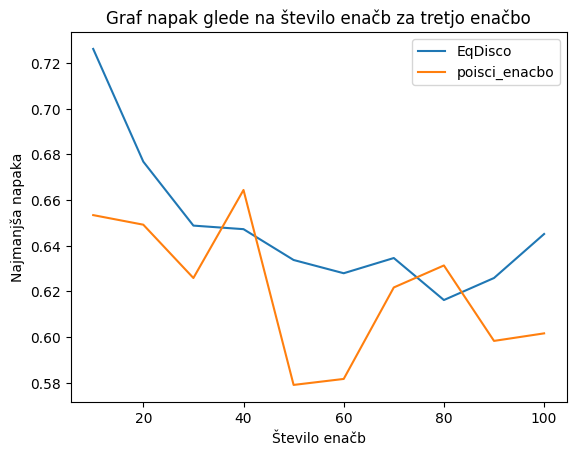

In [224]:
ax = plt.subplot()
ax.plot(st_enacb, min_errors_alg1_3, label = "EqDisco")
ax.plot(st_enacb, min_errors_alg2_3, label = "poisci_enacbo")
ax.set_xlabel("Število enačb")
ax.set_ylabel("Najmanjša napaka")
ax.set_title("Graf napak glede na število enačb za tretjo enačbo")
ax.legend()